In [72]:
import warnings 
warnings.filterwarnings("ignore")

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
pd.set_option("display.max_columns",None)
plt.rcParams["font.size"]=20

In [74]:
df=pd.read_csv("C:\\Users\\muska\\OneDrive\\Documents\\ddosdataset.csv")

In [75]:
df.columns = df.columns.str.strip()

In [76]:
df.shape

(225745, 79)

In [77]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [78]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [79]:
feature_names = df.drop(columns=['Label']).columns.tolist()
print(feature_names)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [80]:
nullvalue_features=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [81]:
print(nullvalue_features)

['Flow Bytes/s']


In [82]:
df['Flow Bytes/s'].isnull().sum()

np.int64(4)

In [83]:
df=df.dropna().drop_duplicates(keep="first").reset_index(drop=True)

In [84]:
df.shape

(223108, 79)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223108 entries, 0 to 223107
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             223108 non-null  int64  
 1   Flow Duration                223108 non-null  int64  
 2   Total Fwd Packets            223108 non-null  int64  
 3   Total Backward Packets       223108 non-null  int64  
 4   Total Length of Fwd Packets  223108 non-null  int64  
 5   Total Length of Bwd Packets  223108 non-null  int64  
 6   Fwd Packet Length Max        223108 non-null  int64  
 7   Fwd Packet Length Min        223108 non-null  int64  
 8   Fwd Packet Length Mean       223108 non-null  float64
 9   Fwd Packet Length Std        223108 non-null  float64
 10  Bwd Packet Length Max        223108 non-null  int64  
 11  Bwd Packet Length Min        223108 non-null  int64  
 12  Bwd Packet Length Mean       223108 non-null  float64
 13 

In [86]:
df['Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [87]:
df['Label'].value_counts()

Label
DDoS      128016
BENIGN     95092
Name: count, dtype: int64

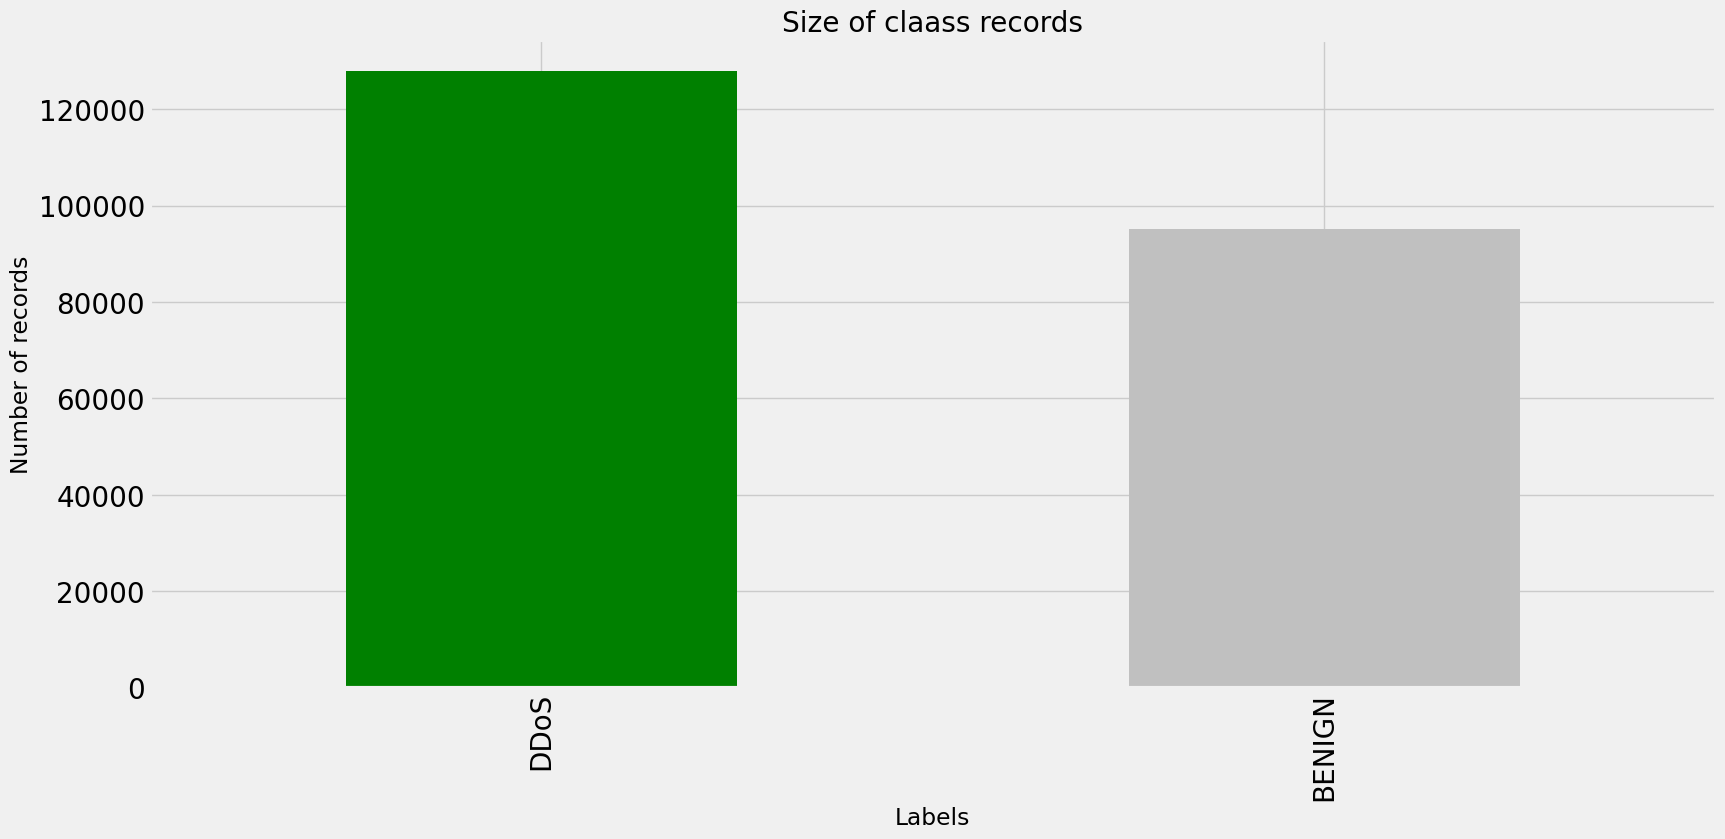

In [88]:
with plt.style.context(style="fivethirtyeight"):
    df['Label'].value_counts().plot.bar(fontsize=20,figsize=(18,8),color=["green","silver"])
    plt.title(label="Size of claass records")
    plt.xlabel(xlabel="Labels")
    plt.ylabel(ylabel="Number of records")
    plt.show()

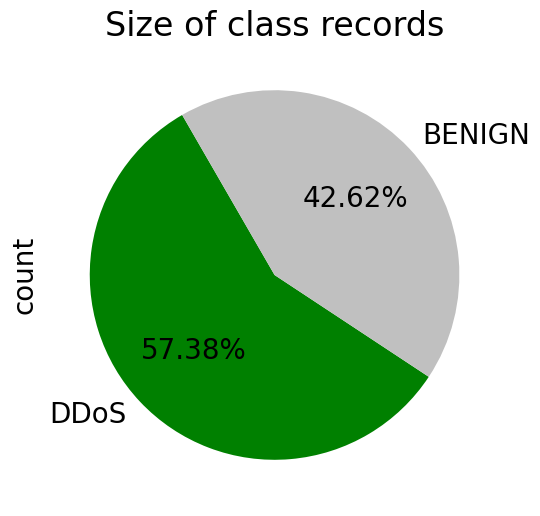

In [89]:
df['Label'].value_counts().plot.pie(fontsize=20,figsize=(6,6),colors=["green","silver"],autopct="%.2f%%",startangle=120)
plt.title(label="Size of class records")
plt.show()

In [90]:
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Number of categorical features:",len(categorical_features))
print("Name of the categorical features:",categorical_features)

Number of categorical features: 1
Name of the categorical features: ['Label']


In [91]:
df['Label']=df['Label'].apply(lambda x: 0 if x=='BENIGN' else 1)

In [92]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [93]:
df['Label'].value_counts()

Label
1    128016
0     95092
Name: count, dtype: int64

In [94]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]


In [95]:
benign = df[df['Label'] == 0].sample(n=2500, random_state=42)
malicious = df[df['Label'] == 1].sample(n=2500, random_state=42)

test_data = pd.concat([benign, malicious]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data.to_csv('val_data.csv', index=False)


In [96]:
df=df.sample(frac=1).reset_index(drop=True)
X=df.drop(labels='Label',axis=1)
y=df['Label']

In [97]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,9741,3,1,1,6,6,6,6,6.000000,0.000000,6,6,6.0,0.000000,4.000000e+06,666666.666700,3.0000,0.000000e+00,3,3,0,0.0,0.000000e+00,0,0,0,0.00,0.0000,0,0,0,0,0,0,20,20,333333.333300,333333.333300,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.0,20,0,0,0,0,0,0,1,6,1,6,118,16417,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,80,1832805,3,5,26,11607,20,0,8.666667,10.263203,10135,0,2321.4,4413.201989,6.347102e+03,4.364894,261829.2857,6.922532e+05,1831712,4,788,394.0,3.832519e+02,665,123,1832798,458199.50,915675.0783,1831712,4,0,0,0,0,72,112,1.636835,2.728059,0,10135,1292.555556,3350.634907,1.120000e+07,0,0,0,1,0,0,0,0,1,1454.125000,8.666667,2321.4,72,0,0,0,0,0,0,3,26,5,11607,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0
2,80,1268031,3,5,26,11601,20,0,8.666667,10.263203,5840,0,2320.2,2658.195854,9.169334e+03,6.308994,181147.2857,4.727525e+05,1253183,27,14550,7275.0,9.858483e+03,14246,304,1268004,317001.00,624158.4866,1253183,60,0,0,0,0,72,112,2.365873,3.943121,0,5840,1291.888889,2240.544155,5.020038e+06,0,0,0,1,0,0,0,0,1,1453.375000,8.666667,2320.2,72,0,0,0,0,0,0,3,26,5,11601,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0
3,80,9843633,7,5,50,11607,20,0,7.142857,6.094494,10135,0,2321.4,4413.201989,1.184217e+03,1.219062,894875.7273,2.288114e+06,7593398,5,9417825,1569637.5,3.039732e+06,7593398,183,426653,106663.25,212556.2305,425497,5,0,0,0,0,152,112,0.711120,0.507943,0,10135,897.153846,2804.564846,7.865584e+06,0,0,0,0,1,0,0,0,0,971.916667,7.142857,2321.4,152,0,0,0,0,0,0,7,50,5,11607,256,229,5,20,1823561.0,0.0,1823561,1823561,7593398.0,0.0,7593398,7593398
4,50000,76,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0,0.000000,0.000000e+00,26315.789470,76.0000,0.000000e+00,76,76,0,0.0,0.000000e+00,0,0,0,0.00,0.0000,0,0,0,0,0,0,32,32,13157.894740,13157.894740,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.0,32,0,0,0,0,0,0,1,0,1,0,114,296,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [98]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Label, dtype: int64

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [100]:
with open(file="models/Normalization_model.pkl",mode="wb") as file:
    pickle.dump(obj=scaler,file=file)

In [101]:
X=scaler.transform(X)

In [102]:
print(X)

[[1.48644937e-01 3.33333506e-08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.22077764e-03 1.52733912e-02 1.03573278e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.22077764e-03 1.05669388e-02 1.03573278e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.08765183e-04 1.01580052e-03 5.17866390e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.76005616e-03 4.26009220e-02 2.58933195e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.22077764e-03 1.10372807e-02 1.03573278e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(178465, 78) (44617, 78) (178465,) (44617,)


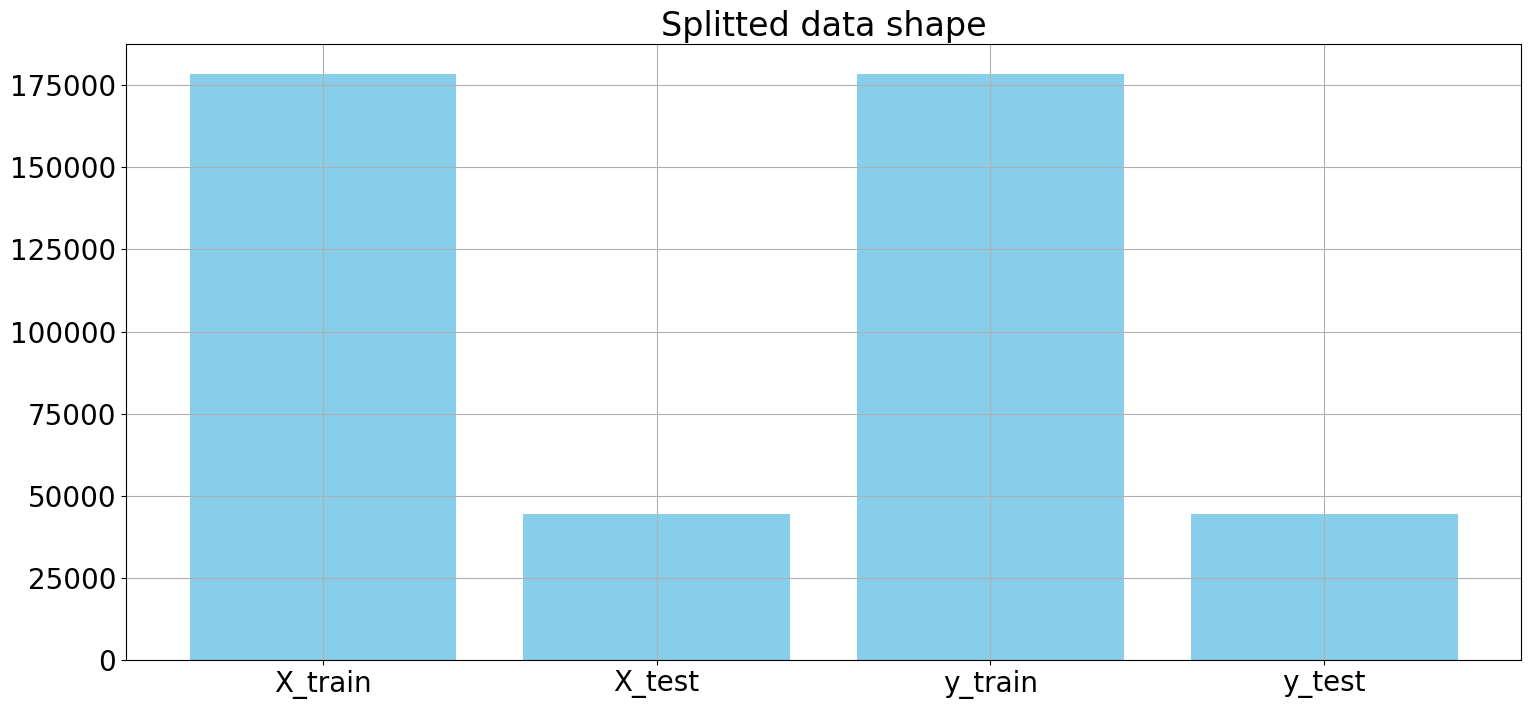

In [104]:
plt.figure(figsize=(18,8))
plt.bar(x=["X_train","X_test","y_train","y_test"],height=[X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]], color='skyblue')
plt.grid(True)
plt.title(label="Splitted data shape")
plt.show()

In [105]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [106]:
LR_preds=LR_model.predict(X_test)
print(LR_preds)

[1 1 0 ... 1 1 0]


In [107]:
LR_Accuracy=accuracy_score(y_test,LR_preds)
print("Accuracy is {:.2f}%".format(LR_Accuracy*100.0))

Accuracy is 98.89%


In [108]:
print(classification_report(y_true=y_test,y_pred=LR_preds,target_names=["Benign","DDOS"]))

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.99     19125
        DDOS       0.98      1.00      0.99     25492

    accuracy                           0.99     44617
   macro avg       0.99      0.99      0.99     44617
weighted avg       0.99      0.99      0.99     44617



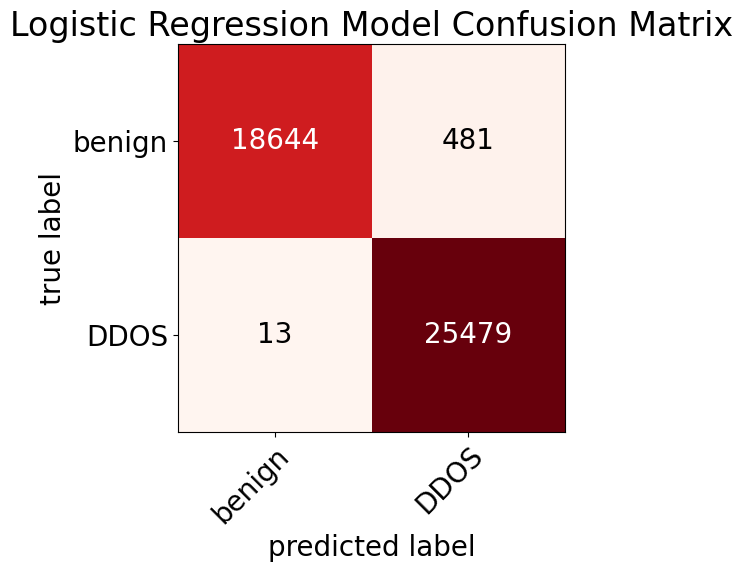

In [109]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=LR_preds)

ax = plot_confusion_matrix(conf_mat=conf_mat,
                           class_names=["benign", "DDOS"],
                           figsize=(5,8),
                           cmap=plt.cm.Reds)

plt.title("Logistic Regression Model Confusion Matrix")
plt.show()

In [110]:
with open(file="models/LogisticRegression.pkl",mode="wb")as file:
    pickle.dump(obj=LR_model,file=file)